In [66]:
import pandas as pd
import numpy as np

In [67]:
base_url = "https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/"
vers = 8
rev = 1


In [68]:
def make_month_url(year, month, base_url=base_url):
    return f"{base_url}/{year}/{str(month).zfill(2)}/"



In [118]:
#month_url = make_month_url(2015, 9)
month_url = make_month_url(2015, 4)
month_url

'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2//2015/04/'

In [125]:
import requests
from bs4 import  BeautifulSoup

In [126]:
def get_all_csv_filenames(url):
    req = requests.get(url)
    soup=BeautifulSoup(req.text)
    return [s for s in [x["href"] for x in soup.find_all("a", href=True)] if "csv" in s]

def create_csv_urls(month_url, filenames):
    return [month_url+f for f in filenames]


In [127]:
ion_files = [x for x in get_all_csv_filenames(month_url) if "ion" in x]
ion_urls = create_csv_urls(month_url, ion_files)
len(ion_urls)

41

In [128]:
dfs = []
for f in ion_urls:
    df = pd.read_csv(f,na_values=[' ','NaN']).drop_duplicates()
    dfs.append(df)

In [129]:
all_ion = pd.concat(dfs)

In [130]:
all_ion

,t_utc,t_unix,t_sclk,t_tid,tid,orbit,focusmode,alt,lst,long,lat,sza,ion_mass,cps_dt,abundance,sensitivity,SC_potential,precision,quality
0,2015-04-01T01:19:42,1.427851e+09,4.811232e+08,4682.203520,15446,973,osion,547.3044,12.76639,137.34490,-33.846920,20.02199,2.0,74.082613,0.094287,550,-1.214786,0.116183,SCP
1,2015-04-01T01:19:49,1.427851e+09,4.811232e+08,4689.203520,15446,973,osion,540.6853,12.77639,137.46770,-33.479930,19.78948,2.0,1370.439174,1.744195,550,-0.906077,0.027013,SCP
2,2015-04-01T01:19:51,1.427851e+09,4.811232e+08,4691.203520,15446,973,osion,538.8023,12.77917,137.50260,-33.374800,19.72326,2.0,2222.249902,2.828318,550,-0.715055,0.021213,SCP
3,2015-04-01T01:19:54,1.427851e+09,4.811232e+08,4694.203520,15446,973,osion,535.9845,12.78361,137.55490,-33.216900,19.62661,2.0,2259.302400,2.875476,550,-0.694265,0.021038,SCP
4,2015-04-01T01:19:57,1.427851e+09,4.811232e+08,4697.203520,15446,973,osion,533.1750,12.78778,137.60710,-33.058720,19.52875,2.0,2851.916175,3.629711,550,-0.703599,0.018725,SCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17357,2015-04-30T23:55:24,1.430438e+09,4.837101e+08,5513.763662,15766,1133,osion,173.2761,11.02167,60.92347,-5.069483,15.53944,132.0,37.039747,0.067349,550,-1.690698,0.164311,SCP
17358,2015-04-30T23:55:41,1.430438e+09,4.837101e+08,5530.763662,15766,1133,osion,176.3202,11.04250,61.16565,-3.961679,15.69872,132.0,37.039747,0.067346,550,-1.965825,0.164311,SCP
17359,2015-04-30T23:55:51,1.430438e+09,4.837101e+08,5540.763662,15766,1133,osion,178.3213,11.05472,61.30745,-3.310890,15.82947,132.0,37.039747,0.067344,550,-1.858865,0.164311,SCP
17360,2015-04-30T23:55:54,1.430438e+09,4.837101e+08,5543.763662,15766,1133,osion,178.9519,11.05833,61.34990,-3.115792,15.87458,132.0,37.039747,0.067344,550,-1.895874,0.164311,SCP


In [131]:
#tid_start = 17103
#tid_end = 17177
tid_start = 15617
tid_end = 15673
#tid_start = 25318 - 1 
#tid_end = 25400 + 1

ion_dd4 = all_ion[all_ion["tid"].between(tid_start, tid_end)]
ion_dd4_co2 = ion_dd4[ion_dd4["ion_mass"]==44]
ion_dd4_co2

,t_utc,t_unix,t_sclk,t_tid,tid,orbit,focusmode,alt,lst,long,lat,sza,ion_mass,cps_dt,abundance,sensitivity,SC_potential,precision,quality
12225,2015-04-17T05:43:57,1.429249e+09,4.825214e+08,4748.894096,15618,1059,osion,456.9521,11.21306,-155.78500,-42.46807,30.73945,44.0,8223.066290,10.465720,550,-1.703562,0.011028,SCP
12226,2015-04-17T05:44:00,1.429249e+09,4.825214e+08,4751.894096,15618,1059,osion,454.2202,11.21861,-155.71170,-42.30706,30.56718,44.0,8370.389665,10.653223,550,-1.364902,0.010930,SCP
12227,2015-04-17T05:44:03,1.429249e+09,4.825214e+08,4754.894096,15618,1059,osion,451.4973,11.22444,-155.63880,-42.14574,30.39336,44.0,9444.603419,12.020404,550,-1.364146,0.010290,SCP
12228,2015-04-17T05:44:06,1.429249e+09,4.825214e+08,4757.894096,15618,1059,osion,448.7833,11.23000,-155.56620,-41.98413,30.22041,44.0,8629.928283,10.983545,550,-1.234700,0.010765,SCP
12229,2015-04-17T05:44:09,1.429249e+09,4.825214e+08,4760.894096,15618,1059,osion,446.0784,11.23556,-155.49380,-41.82221,30.04711,44.0,10223.135465,13.011263,550,-1.623771,0.009890,SCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12768,2015-04-22T02:18:00,1.429669e+09,4.829411e+08,6042.423660,15670,1085,osion,438.0695,12.55056,-37.44196,34.38010,47.49656,44.0,37.039747,0.067345,550,-1.562477,0.164311,SCP
12769,2015-04-22T02:18:11,1.429669e+09,4.829411e+08,6053.423660,15670,1085,osion,447.9661,12.56750,-37.23191,34.98288,48.12823,44.0,37.039747,0.067345,550,-2.366753,0.164311,SCP
12770,2015-04-22T02:18:14,1.429669e+09,4.829411e+08,6056.423660,15670,1085,osion,450.6861,12.57222,-37.17420,35.14662,48.30012,44.0,74.082613,0.134696,550,-2.352304,0.116183,SCP
12771,2015-04-22T02:18:20,1.429669e+09,4.829411e+08,6062.423660,15670,1085,osion,456.1529,12.58139,-37.05826,35.47327,48.64243,44.0,37.039747,0.067345,550,0.000000,0.164311,SCP


In [132]:
in_dfs = []
for orb_num, orb_data in ion_dd4_co2.groupby("orbit"):
    min_alt = orb_data["alt"].min()
    min_alt_index = orb_data["alt"].idxmin()
    if type(min_alt)==pd.Series:
        min_alt = min_alt.iloc[0]
    inbound = orb_data[orb_data["t_unix"] <= orb_data.loc[min_alt_index]["t_unix"]]
    in_dfs.append(inbound)

In [133]:
ion_dd4_co2_in = pd.concat(in_dfs)

In [134]:
bins = np.arange(100, 500, 5)
bin_mids = (bins[0:-1] + bins[1:])/2
ion_dd4_co2_in["alt_bin"] = pd.cut(ion_dd4_co2_in["alt"], bins, labels=bin_mids)

In [135]:
avg = ion_dd4_co2_in[["alt_bin", "abundance"]].groupby("alt_bin").mean().rename(columns={"abundance": "abundance_mean"})
std = ion_dd4_co2_in[["alt_bin", "abundance"]].groupby("alt_bin").std().rename(columns={"abundance": "abundance_std"})
avg = pd.merge(avg, std, left_index=True, right_index=True)
avg = avg.reset_index()
avg

,alt_bin,abundance_mean,abundance_std
0,102.5,NaN,NaN
1,107.5,NaN,NaN
2,112.5,NaN,NaN
3,117.5,NaN,NaN
4,122.5,NaN,NaN
...,...,...,...
74,472.5,5.232515,5.160385
75,477.5,5.063369,5.399172
76,482.5,3.827378,4.346785
77,487.5,5.044029,5.522769


In [136]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Altitude [km]')

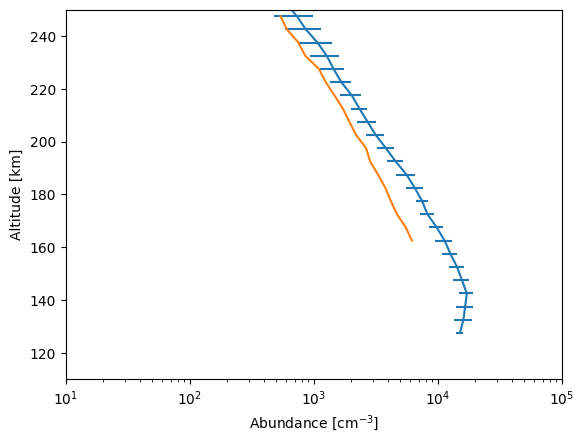

In [140]:
plt.errorbar(avg["abundance_mean"], avg["alt_bin"], xerr=avg["abundance_std"])
plt.plot(ydf["CO2+"], ydf["alt"])
plt.xscale("log")
plt.ylim(110, 250)
plt.xlim(10, 1.e+5)
plt.xlabel(r"Abundance [cm$^{-3}$]")
plt.ylabel("Altitude [km]")

In [23]:
avg.dropna().rename(columns={"alt_bin": "altitude"}).to_csv("../../Desktop/DD2_ion_44.csv", index=False)

In [24]:
avg.max()

alt_bin             492.500000
abundance_mean    17138.561040
abundance_std      2630.389334
dtype: float64

In [138]:
ydf = pd.read_csv(
    "../../Desktop/GDrive/data/yoshida_21_ion_densities/NGIMS_ion_neutral_density_variation_dataset/Vertical_profile_of_neutral_ion_density/Vertical_ion_Ls299-310.dat",
    header=1,
    names=["alt", "CO2+"],
    usecols=[0, 1],
    delim_whitespace=True
)

Text(0, 0.5, 'Altitude [km]')

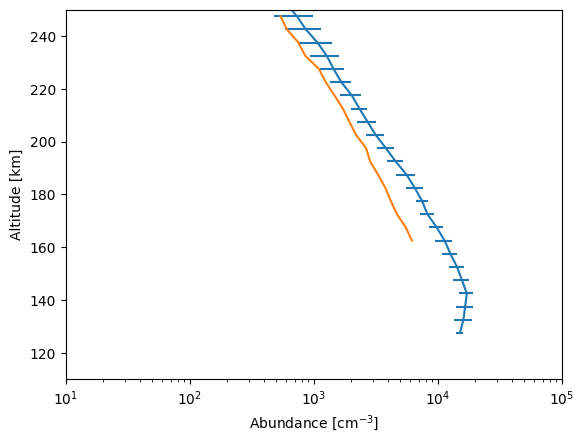

In [139]:
plt.errorbar(avg["abundance_mean"], avg["alt_bin"], xerr=avg["abundance_std"])
plt.plot(ydf["CO2+"], ydf["alt"])
plt.xscale("log")
plt.ylim(110, 250)
plt.xlim(10, 1.e+5)
plt.xlabel(r"Abundance [cm$^{-3}$]")
plt.ylabel("Altitude [km]")